# PLN - Modelo de processo de linguagêm natural
**Análise de sentimento tweets - Vacina Moderna**

In [1]:
from platform import python_version

print('Versão Jupyter Notebook neste projeto:', python_version())

Versão Jupyter Notebook neste projeto: 3.9.7


In [2]:
# Importação das bibliotecas 

import pandas as pd # Pandas carregamento csv
import numpy as np # Numpy para carregamento cálculos em arrays multidimensionais

# Visualização de dados
import seaborn as sns
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly
import plotly.express as px

# Carregar as versões das bibliotecas
import watermark

# Warnings retirar alertas 
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Versões das bibliotecas

%reload_ext watermark
%watermark -a "Versões das bibliotecas" --iversions

Author: Versões das bibliotecas

plotly    : 5.5.0
pandas    : 1.3.4
matplotlib: 3.4.3
seaborn   : 0.11.2
watermark : 2.3.0
numpy     : 1.20.3



In [4]:
# Configuração para os gráficos largura e layout dos graficos

plt.rcParams["figure.figsize"] = (25, 20)

plt.style.use('fivethirtyeight')
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

m.rcParams['axes.labelsize'] = 25
m.rcParams['xtick.labelsize'] = 25
m.rcParams['ytick.labelsize'] = 25
m.rcParams['text.color'] = 'k'

In [5]:
# Carregando a base de dados
df = pd.read_csv("vaccine_moderna.csv")
df

,Unnamed: 0,Tweet,Subjectivity,Polarity,Score
0,0,After carefully reviewing the available safety...,0.700000,0.150000,Positive
1,1,Happy Pride! We are proud to celebrate our LGB...,1.000000,0.900000,Positive
2,2,We are proud to be highlighted as an AWS innov...,1.000000,1.000000,Positive
3,3,This morning we announced an agreement with t...,0.125000,0.000000,Neutral
4,4,"This morning, we announced that we have reques...",0.000000,0.000000,Neutral
...,...,...,...,...,...
1226,1229,CNBC recognizes Moderna as a top 50 company wh...,0.550000,0.033333,Positive
1227,1230,Congrats to 8 on the annual Disruptor 50 lis...,0.000000,0.000000,Neutral
1228,1231,"Doubling footprint, creating jobs and making a...",0.100000,0.000000,Neutral
1229,1232,Ribbon cutting at its new headquarters - expa...,0.677273,-0.214773,Negative


In [6]:
# Exibido 5 primeiros dados
df.head()

,Unnamed: 0,Tweet,Subjectivity,Polarity,Score
0,0,After carefully reviewing the available safety...,0.700,0.15,Positive
1,1,Happy Pride! We are proud to celebrate our LGB...,1.000,0.90,Positive
2,2,We are proud to be highlighted as an AWS innov...,1.000,1.00,Positive
3,3,This morning we announced an agreement with t...,0.125,0.00,Neutral
4,4,"This morning, we announced that we have reques...",0.000,0.00,Neutral


In [7]:
# Exibido 5 últimos dados 
df.tail(5)

,Unnamed: 0,Tweet,Subjectivity,Polarity,Score
1226,1229,CNBC recognizes Moderna as a top 50 company wh...,0.550000,0.033333,Positive
1227,1230,Congrats to 8 on the annual Disruptor 50 lis...,0.000000,0.000000,Neutral
1228,1231,"Doubling footprint, creating jobs and making a...",0.100000,0.000000,Neutral
1229,1232,Ribbon cutting at its new headquarters - expa...,0.677273,-0.214773,Negative
1230,1233,Moderna Announces Expansion to New Facility in...,0.454545,0.136364,Positive


In [8]:
# Número de linhas e colunas
df.shape

(1231, 5)

In [9]:
# Exibido tipos de dados
df.dtypes

Unnamed: 0        int64
Tweet            object
Subjectivity    float64
Polarity        float64
Score            object
dtype: object

In [10]:
# Verificando informações das variaveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1231 entries, 0 to 1230
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1231 non-null   int64  
 1   Tweet         1231 non-null   object 
 2   Subjectivity  1231 non-null   float64
 3   Polarity      1231 non-null   float64
 4   Score         1231 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 48.2+ KB


In [11]:
# Total de colunas e linhas 

print("Números de linhas: {}" .format(df.shape[0]))
print("Números de colunas: {}" .format(df.shape[1]))

Números de linhas: 1231
Números de colunas: 5


In [12]:
# Exibindo valores ausentes e valores únicos

print("\nMissing values :  ", df.isnull().sum().values.sum())
print("\nUnique values :  \n",df.nunique())


Missing values :   0

Unique values :  
 Unnamed: 0      1231
Tweet           1224
Subjectivity     170
Polarity         181
Score              3
dtype: int64


In [13]:
# Verificando a polaridade
df.Polarity.value_counts()

 0.000000    564
 0.500000     70
 0.136364     59
 0.250000     47
 0.800000     28
            ... 
-0.062500      1
-0.025000      1
 0.091667      1
 0.212121      1
-0.214773      1
Name: Polarity, Length: 181, dtype: int64

In [14]:
# Renomeando colunas
df.columns = ["Usuario",
              "Text",
              "Subjetividade",
              "Polaridade",
              "Sentimento"]
df.head()

,Usuario,Text,Subjetividade,Polaridade,Sentimento
0,0,After carefully reviewing the available safety...,0.700,0.15,Positive
1,1,Happy Pride! We are proud to celebrate our LGB...,1.000,0.90,Positive
2,2,We are proud to be highlighted as an AWS innov...,1.000,1.00,Positive
3,3,This morning we announced an agreement with t...,0.125,0.00,Neutral
4,4,"This morning, we announced that we have reques...",0.000,0.00,Neutral


In [15]:
# Exibindo estatísticas descritivas visualizar alguns detalhes estatísticos básicos como percentil, média, padrão, etc. 
# De um quadro de dados ou uma série de valores numéricos.

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Usuario,1231.0,617.160032,356.495863,0.0,308.5,618.000000,925.500000,1233.0
Subjetividade,1231.0,0.332866,0.331597,0.0,0.0,0.315758,0.540833,1.0
Polaridade,1231.0,0.162339,0.263682,-1.0,0.0,0.000000,0.286797,1.0


Text(0.5, 1.0, 'Matriz de correlação')

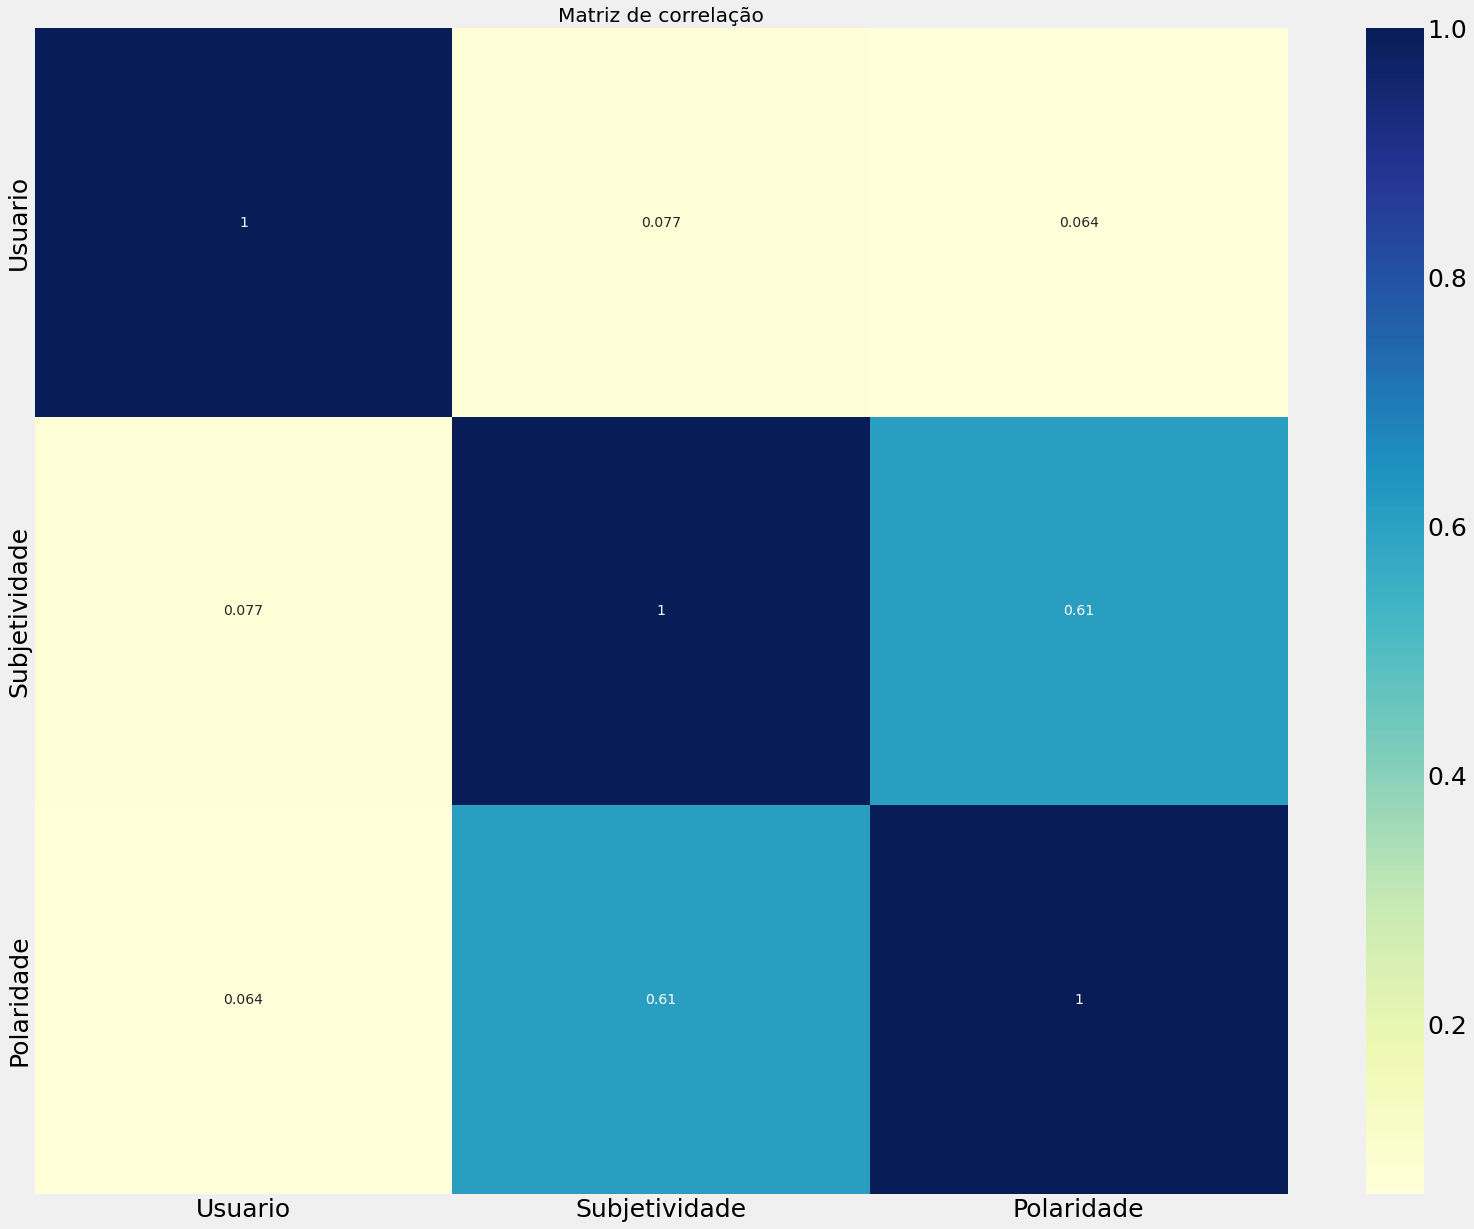

In [16]:
# Gráfico da matriz de correlação


ax = sns.heatmap(df.corr(), annot=True, cmap='YlGnBu');
plt.title("Matriz de correlação")

# Análise de dados

Text(0, 0.5, 'Total')

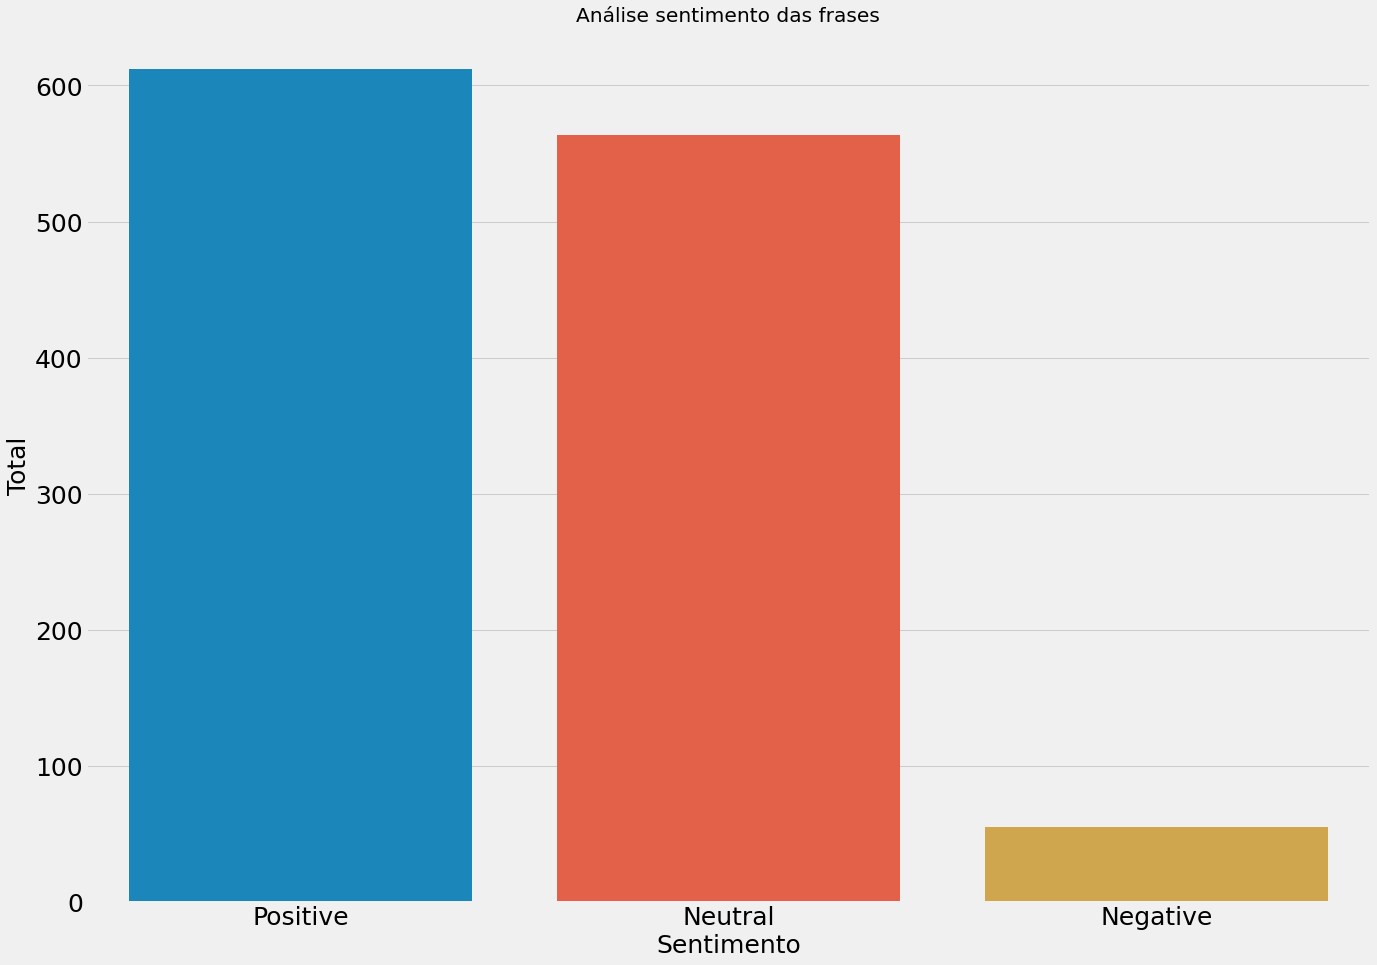

In [17]:
# Gráfico de Análise sentimento

plt.figure(figsize=(20.5,15))

plt.title("Análise sentimento das frases")
ax = sns.countplot(df["Sentimento"])
plt.xlabel("Sentimento")
plt.ylabel("Total")

Text(0, 0.5, 'Total')

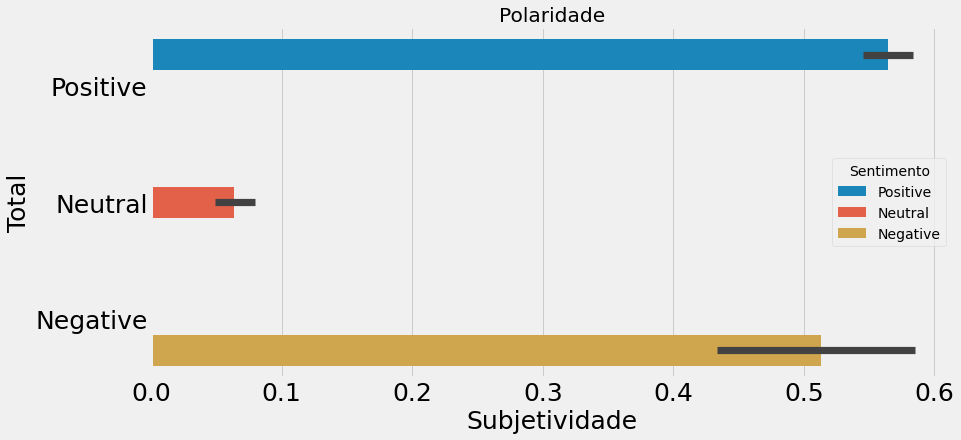

In [18]:
# Gráfico de sentimento e subjetividade
plt.figure(figsize=(12.8,6))

ax = sns.barplot(x="Subjetividade", y="Sentimento", data = df, hue="Sentimento")
plt.title("Polaridade")
plt.xlabel("Subjetividade")
plt.ylabel("Total")

Text(0, 0.5, 'Total')

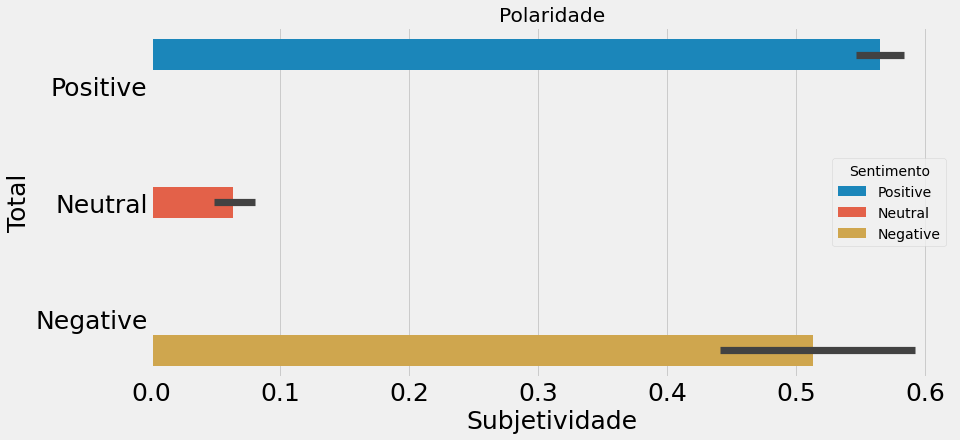

In [20]:
# Gráfico de sentimento e subjetividade
plt.figure(figsize=(12.8,6))

ax = sns.barplot(x="Subjetividade", y="Sentimento", data = df, hue="Sentimento")
plt.title("Polaridade")
plt.xlabel("Subjetividade")
plt.ylabel("Total")

Text(0, 0.5, 'Total')

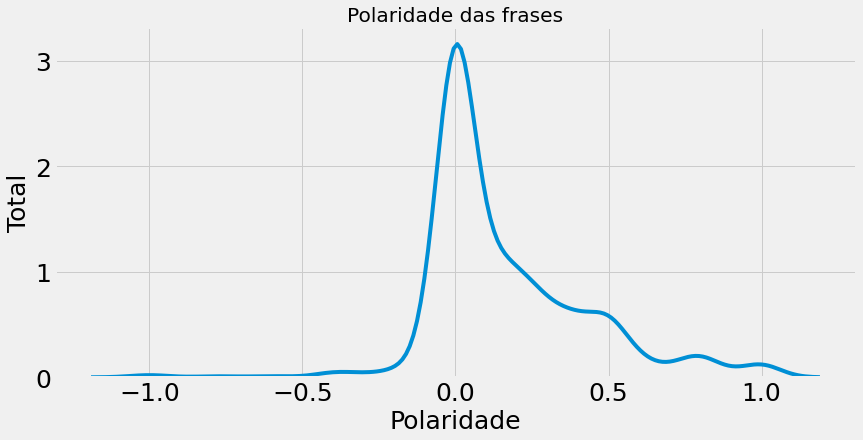

In [21]:
# Gráfico polaridade das frases

plt.figure(figsize=(12.8,6))

plt.title("Polaridade das frases")
ax = sns.kdeplot(df["Polaridade"])
plt.xlabel("Polaridade")
plt.ylabel("Total")

Text(0, 0.5, 'Total')

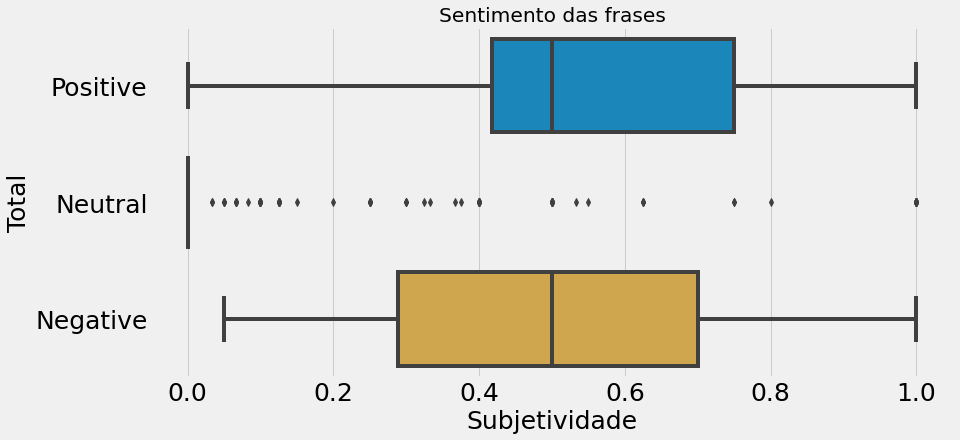

In [22]:
# Gráfico subjetividade e sentimento

plt.figure(figsize=(12.8,6))

ax = sns.boxplot(x="Subjetividade", y="Sentimento", data = df)
plt.title("Sentimento das frases")
plt.xlabel("Subjetividade")
plt.ylabel("Total")

Text(0, 0.5, 'Total')

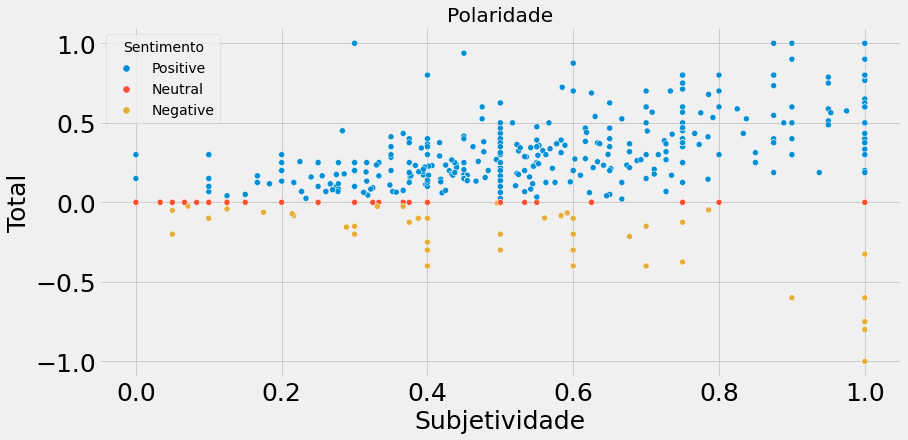

In [23]:
# Gráfico scatterplot de sentimento
plt.figure(figsize=(12.8,6))

ax = sns.scatterplot(x="Subjetividade", y="Polaridade", data=df, hue="Sentimento")
plt.title("Polaridade")
plt.xlabel("Subjetividade")
plt.ylabel("Total")

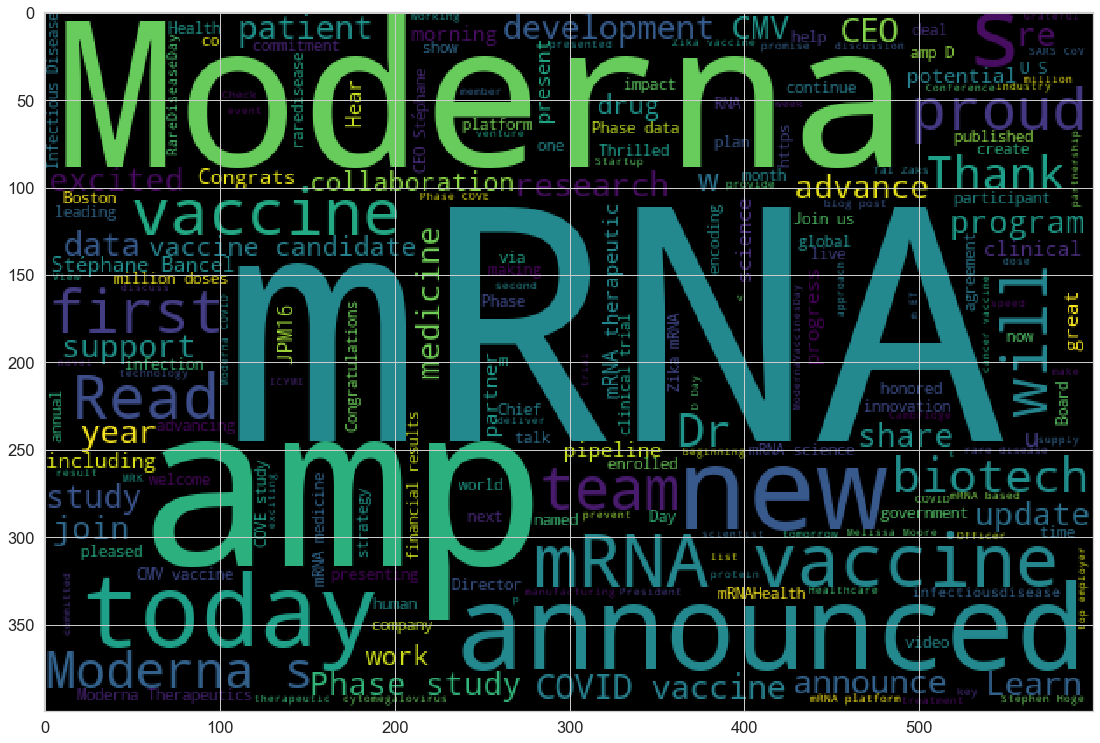

In [23]:
# Gráfico nuvem de palavras
import itertools
from wordcloud import WordCloud

words = ' '.join([tweet for tweet in df['Text']])
wordCloud = WordCloud(width=600, height=400).generate(words)

plt.figure(figsize=(18.8, 16))
plt.imshow(wordCloud)
plt.show()

# Pré - processamento dos dados

In [24]:
# Contagem de texto
df.Text.count()

1231

In [25]:
# Retirando palavras duplicadas
df.drop_duplicates(["Text"], inplace = True)
df.Text.count()

1224

In [34]:
# Treino e teste

train = df["Text"]
test = df["Sentimento"]

In [35]:
# Total de linhas e colunas dados variável x
train.shape

(1224,)

In [36]:
# Total de linhas e colunas dados variável y
test.shape

(1224,)

In [37]:
# Download stopwords, Punkt

import nltk

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rafae\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rafae\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [42]:
# Dados de limpeza para modelo PLN
import re
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Removendo stop words
def remove_stop_words(instancia):
    stopwords = set(nltk.corpus.stopwords.words("english"))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

# stemming no dataset
def text_stemming(instancia):
    stemmer = nltk.stem.RSLPStemmer()

    palavras = []

    for w in instancia.split():
        palavras.append(stemmer.stem(w))
    return (" ".join(palavras))

# Limpando base de dados
def dados_limpos(instancia):
    instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','')
    return (instancia)

# Redução de palavras flexionadas
def Lemmatization(instancia):
    
    palavras = []
    
    for w in instancia.split():
        palavras.append(wordnet_lemmatizer.lemmatize(w))
        return (" ".join(palavras))

# Pré-processamento removendo stopword e removendo caracteres indesejados.
def Preprocessing(instancia):
    instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','').replace('"','')
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

In [43]:
# Visualizando os texto
train = [Preprocessing(i) for i in train]
train

['after carefully reviewing the available safety data to date moderna covid19 vaccine cases of myocarditis a…',
 'happy pride! we are proud to celebrate our lgbtq+ community and honor pride month this june by taking time tea…',
 'we are proud to be highlighted an aws innovator! has helped us drive innovation to optimize our busin…',
 'this morning we announced an agreement with to commercialize the moderna covid19 vaccine and future v…',
 'this morning, we announced that we have requested an emergency use authorization (eua our covid19 vaccine in…',
 'we also announced new agreement with to commercialize our covid19 vaccine across central eastern…',
 'we also announced that we have submitted authorization of our covid19 vaccine in adolescents with health canad…',
 'this morning, we announced that we have submitted conditional marketing approval (cma our covid19 vacci…',
 'did you know that cytomegalovirus is the number 1 infection that causes birth defects in the us? june is…',
 'today

In [45]:
# Word tokenize - E o processo de devidir uma string, textos e uma lista tokens 
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer

text = "Passei no concurso da Marinha"

toke = word_tokenize(text)
tweet_tokenizer = TweetTokenizer()
tweet_tokenizer_tt = tweet_tokenizer.tokenize(text)
print(toke)
print(tweet_tokenizer_tt)

['Passei', 'no', 'concurso', 'da', 'Marinha']
['Passei', 'no', 'concurso', 'da', 'Marinha']


In [46]:
# Modelo criado para classificar tweets positivos, negativos
# CountVectorizer criar um vocabulário de palavras e retornar em vetor 
from sklearn.feature_extraction.text import CountVectorizer

vet = CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)
vet_train = vet.fit_transform(train)
vet_train.shape

(1224, 3380)

## Modelo 1 - Regressão logistica

In [47]:
# Modelo Regressão logística- 1
# Modelo machine learning - Regressão logística

# Importação da biblioteca sklearn o modelo
from sklearn.linear_model import LogisticRegression

# Nome do algoritmo M.L
model_logistic = LogisticRegression()

# Treinamento do modelo
model_logistic_fit = model_logistic.fit(vet_train, test)

# Score do modelo
model_logistic_scor = model_logistic.score(vet_train, test)

# Print do score modelo
print("Model - Logistic Regression: %.2f" % (model_logistic_scor * 100))

Model - Logistic Regression: 100.00


In [48]:
# Probabilidade do modelo
model_logistic_prob = model_logistic.predict_log_proba(vet_train)
model_logistic_prob

array([[-5.10812631, -2.06271911, -0.14289542],
       [-6.46208468, -4.87190049, -0.0092631 ],
       [-4.33911955, -3.21275951, -0.05476607],
       ...,
       [-3.92761746, -0.07065596, -3.02563367],
       [-0.43504003, -2.94577738, -1.20330616],
       [-3.81390159, -3.50565485, -0.0534947 ]])

In [49]:
# Previsão do modelo
model_logistic_pred = model_logistic.predict(vet_train)
model_logistic_pred

array(['Positive', 'Positive', 'Positive', ..., 'Neutral', 'Negative',
       'Positive'], dtype=object)

In [50]:
# Accuracy do modelo
from sklearn import metrics

accuracy = metrics.accuracy_score(test, model_logistic_pred)
print("Accuracy Regression logistic: %.2f" % (accuracy * 100))

Accuracy Regression logistic: 100.00


In [51]:
# Função de negação para modelo

def marque_negacao(texto):
    negacoes = ['não','not']
    negacao_detectada = False
    
    resultado = []
    palavras = texto.split()
    
    for p in palavras:
        p = p.lower()
        if negacao_detectada == True:
            p = p + '_NEG'
        if p in negacoes:
            negacao_detectada = True
        resultado.append(p)
    
    return (" ".join(resultado))

In [53]:
# Pipeline modelo machine learning
from sklearn import svm
from sklearn.pipeline import Pipeline

model_reg_log = Pipeline([ # Pipeline
    ('counts', CountVectorizer()), # CountVectorizer
    ('classifier', LogisticRegression()) # Modelo de classificação de regressão logística 1
])
model_reg_log.fit(train, test) # Treinamento do modelo RL

model_reg_log_simples = Pipeline([ # Pipeline simples 
  ('counts', CountVectorizer()), # CountVectorizer
  ('classifier', LogisticRegression()) # Modelo de classificação de regressão logística 2 - Sentimento
])
model_reg_log_simples.fit(train, test)

model_reg_log_negacoes = Pipeline([ # Pipeline para negativos
  ('counts', CountVectorizer(tokenizer=lambda text: marque_negacao(text))), # Treinamento tokenizer 
  ('classifier', LogisticRegression()) # Modelo de classificação de regressão logística 3 - Negativo 
])

pipeline_model = model_reg_log_negacoes.fit(train, test) # treinamento do Pipeline
pipeline_model

Pipeline(steps=[('counts',
                 CountVectorizer(tokenizer=<function <lambda> at 0x0000014193B54A60>)),
                ('classifier', LogisticRegression())])

In [54]:
# Validação cruzada modelo
validacao_cruzada_Reg = cross_val_predict(model_reg_log, train, test)
accuracy = metrics.accuracy_score(test, validacao_cruzada_Reg)

print("Cross validation model logistic regression: %.2f" % (accuracy * 100))

Cross validation model logistic regression: 73.04


In [55]:
# Cross validation model logistic regression - Modelo

sentimento=['Positivo',
            'Negativo',
            'Neutro']
            
print("Análise de sentimento vacina moderna")
print("\n")
print(pd.crosstab(test, validacao_cruzada_Reg, rownames = ["Real"], colnames=["Predito"], margins = True))

Análise de sentimento vacina moderna


Predito   Negative  Neutral  Positive   All
Real                                       
Negative         1       35        19    55
Neutral          2      448       112   562
Positive         1      161       445   607
All              4      644       576  1224


In [56]:
# Modelo - Regressão logistica

def metricas_pipeline(model_logistic, train, test):
    validacao_cruzada_Reg = cross_val_predict(model_logistic, train, test, cv = 10)
    return "Acurácia do modelo: {}".format(metrics.accuracy_score(validacao_cruzada_Reg, test))

print("Model pipeline Simples:", metricas_pipeline(model_reg_log, train, test))
print("Model pipeline negações:", metricas_pipeline(model_reg_log_simples, train, test))
print("Model pipeline SVM simples:", metricas_pipeline(model_reg_log_negacoes, train, test))

Model pipeline Simples: Acurácia do modelo: 0.7532679738562091
Model pipeline negações: Acurácia do modelo: 0.7532679738562091
Model pipeline SVM simples: Acurácia do modelo: 0.5784313725490197


## Modelo 2 - Naive bayes

In [57]:
# Modelo machine learning - 2

# Importação da biblioteca sklearn o modelo Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# Nome do algoritmo M.L
model_naive_bayes = MultinomialNB()

# Treinamento do modelo
model_naive_bayes_fit = model_naive_bayes.fit(vet_train, test)

# Score do modelo
model_naive_bayes_scor = model_naive_bayes.score(vet_train, test)
print("Model - Naive Bayes: %.2f" % (model_naive_bayes_scor * 100))

Model - Naive Bayes: 93.30


In [58]:
# Probabilidade do modelo

model_naive_bayes_prob = model_naive_bayes.predict_proba(vet_train).round(2)
print(model_naive_bayes_prob)

[[0.   0.01 0.99]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 ...
 [0.   1.   0.  ]
 [0.73 0.01 0.26]
 [0.   0.01 0.99]]


In [59]:
# Previsão do modelo
model_naive_bayes_multinomial_predict = model_naive_bayes.predict(vet_train)
model_naive_bayes_multinomial_predict

array(['Positive', 'Positive', 'Positive', ..., 'Neutral', 'Negative',
       'Positive'], dtype='<U8')

In [78]:
# Accuracy do modelo

accuracy = metrics.accuracy_score(test, model_naive_bayes_multinomial_predict)
print("Accuracy model Naive bayes MultinomialNB: %.2f" % (accuracy * 100))

Accuracy model Naive bayes MultinomialNB: 93.30


In [60]:
# Negação do modelo

def marque_negacao(texto):
    negacoes = ['não','not']
    negacao_detectada = False
    
    resultado = []
    palavras = texto.split()
    
    for p in palavras:
        p = p.lower()
        if negacao_detectada == True:
            p = p + '_NEG'
        if p in negacoes:
            negacao_detectada = True
        resultado.append(p)
    
    return (" ".join(resultado))

In [63]:
model_pipeline_simples = Pipeline([ # Pipeline naive bayes
  ('counts', CountVectorizer()), # CountVectorizer treinamneto
  ('classifier', MultinomialNB()) # Modelo naive bayes classificação
])
model_pipeline_simples.fit(train, test) # Treinamento pipeline 1 

model_pipeline_negacoes = Pipeline([ # Pipeline negação 
  ('counts', CountVectorizer(tokenizer=lambda text: marque_negacao(text))), # Treinamento tokenizer 
  ('classifier', MultinomialNB()) # Modelo naive bayes classificação
])
model_pipeline_negacoes.fit(train, test) # Treinamento pipeline 1 

model_pipeline_svm_simples = Pipeline([ # Pipeline SVM - 1
    ("counts", CountVectorizer()),  # Treinamento tokenizer 
    ("classifier", svm.SVC(kernel = "linear")) # SVM Modelo 
])
model_pipeline_svm_simples.fit(train, test) # Treinamento pipeline 2 

model_pipeline_svm_negacoes = Pipeline([ # Pipeline SVM - 2 Negações
    ("counts", CountVectorizer(tokenizer = lambda text: marque_negacao(text))), # Treinamento tokenizer 
    ("classifier", svm.SVC(kernel = "linear")) # SVM Modelo
])
model_pipeline_svm_negacoes.fit(train, test) # Treinamento do Pipeline 2 - Negaçoes

Pipeline(steps=[('counts',
                 CountVectorizer(tokenizer=<function <lambda> at 0x000001419141A9D0>)),
                ('classifier', SVC(kernel='linear'))])

In [65]:
# Validação cruzada modelo
validacao_cruzada_naive_bayes = cross_val_predict(model_pipeline_simples, train, test)
accuracy = metrics.accuracy_score(test, validacao_cruzada_naive_bayes)

print("Cross validation accuracy model Naive bayes: %.2f" % (accuracy * 100))

Cross validation accuracy model Naive bayes: 64.54


In [66]:
# Matriz sentimento

sentimento=['Positivo',
            'Negativo',
            'Neutro']

print("Análise de sentimento vacina moderna")
print("\n")
print(pd.crosstab(test, validacao_cruzada_naive_bayes, rownames = ["Real"], colnames=["Predito"], margins = True))

Análise de sentimento vacina moderna


Predito   Negative  Neutral  Positive   All
Real                                       
Negative         0       27        28    55
Neutral          1      298       263   562
Positive         1      114       492   607
All              2      439       783  1224


In [67]:
# Modelo - Naive Nayes

def metricas_pipeline(model_naive_bayes, train, test):
    validacao_cruzada = cross_val_predict(model_naive_bayes, train, test, cv = 10)
    return "Acurácia do modelo: {}".format(metrics.accuracy_score(validacao_cruzada, test))

print("Model pipeline Naive Bayes Simples:", metricas_pipeline(model_pipeline_simples, train, test))
print("Model pipeline Naive Bayes negações:", metricas_pipeline(model_pipeline_negacoes, train, test))
print("Model pipeline SVM simples:", metricas_pipeline(model_pipeline_svm_simples, train, test))
print("Model pipeline SVM negacoes:", metricas_pipeline(model_pipeline_svm_negacoes, train, test))

Model pipeline Naive Bayes Simples: Acurácia do modelo: 0.6756535947712419
Model pipeline Naive Bayes negações: Acurácia do modelo: 0.5506535947712419
Model pipeline SVM simples: Acurácia do modelo: 0.7785947712418301
Model pipeline SVM negacoes: Acurácia do modelo: 0.576797385620915


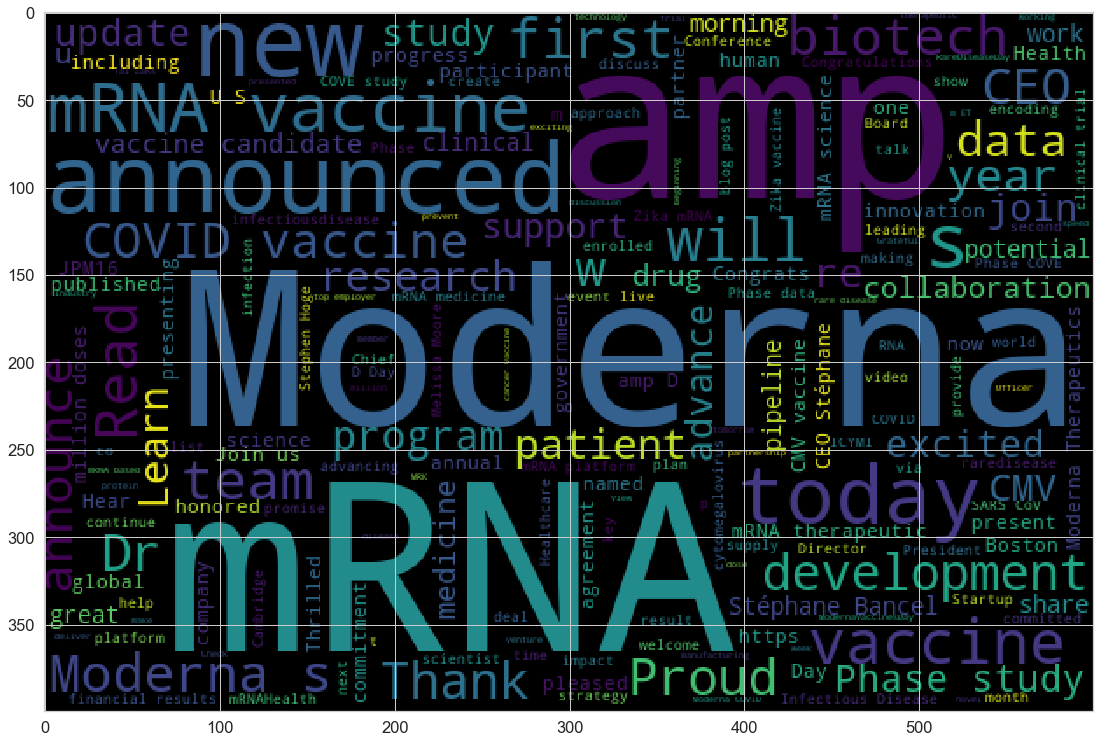

In [82]:
words = ' '.join([tweet for tweet in df['Text']])
wordCloud = WordCloud(width=600, height=400).generate(words)

plt.figure(figsize=(18.8, 16))
plt.imshow(wordCloud)
plt.show()